#  Data Science and Business Analytics Internship
##  GRIP : The Sparks Foundation
###   Author : Aditi Parab
###   Exploratory Data Analysis - Sports
In this task, we will be performing exploratory data analysis on the dataset "Indian Premier League" and try to find out the most successful teams, players and factors contributing win or loss of a team. Also, Suggest teams or players a company should endorse for its products.
###   Importing Libraries 

In [1]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns  
%matplotlib inline

###  Loading DataSet

In [5]:
matches = pd.read_csv("matches.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


###  Understanding the Columns:
ID –The attributes contains the information about the unique id for a match.

SEASON –The attribute contains the information about the year when the match has been conducted.

CITY - The attribute hold the information about the city where the match took place.

DATE – The attribute holds the information about the date when the match has been held.

TEAM 1 – The attribute describes that which team is going to bat first.

TEAM 2 – The attribute describe that which team is going to bat second.

TOSS_WINNER – The attribute holds the information about who wins the toss in that match.

TOSS_DECISION – The attribute contains the information about the decision (bat/field) taken by the toss winner.

RESULT – The attribute contains information about the result (normal/tie) of the players.

DL_APPLIED – The attribute describe whether the Duckworth Lewis (DL) rule is applied.

WINNER – The attribute hold the information about the winner of the match.

WIN_BY_RUNS – The attribute describe that which team had win by runs.

8WIN_BY_WICKETS – The attribute describe that which team had win by wickets.

PLAYER_OF_MATCH – The attribute contains information about the man of the match.

VENUE – The attribute contains information about in which place the match has been played.

UMPIRE 1 – The attribute contain information about the names of the umpire 1.

UMPIRE 2 – The attribute contain information about the names of the umpire 2.

UMPIRE 3 – The attribute contain information about the names of the umpire 3.

###  Step 3 : Checking the dataset information

In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

###  We have a few Null Values here.

In [7]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [8]:
matches.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

In [9]:
matches.rename(columns={'win_by_runs':'Bat_1', 'win_by_wickets':'Ball_1'}, inplace=True)

In [10]:
print("City in which most matches have been won: ",matches['city'].value_counts().idxmax()) 
print("Team that has won most matches: ",matches['winner'].value_counts().idxmax()) 
print("Player who has been man of the match most times: ",matches['player_of_match'].value_counts().idxmax()) 
print("Most frequent Umpire 1: " ,matches['umpire1'].value_counts().idxmax())
print("Most frequent Umpire 2: " ,matches['umpire2'].value_counts().idxmax())

City in which most matches have been won:  Mumbai
Team that has won most matches:  Mumbai Indians
Player who has been man of the match most times:  CH Gayle
Most frequent Umpire 1:  HDPK Dharmasena
Most frequent Umpire 2:  C Shamshuddin


###   1.We are going to replace the missing values with the above outputs for their respective columns.
###   2.Since most values are null in umpire 3 we will replace them by NA.

In [11]:
matches['city'].fillna(value='Mumbai', inplace=True)
matches['winner'].fillna(value='Mumbai Indians', inplace=True)
matches['player_of_match'].fillna(value='CH Gayle', inplace=True)
matches['umpire1'].fillna(value='HDPK Dharmasena', inplace=True)
matches['umpire2'].fillna(value='C Shamshuddin', inplace=True)
matches['umpire3'].fillna(value='NA', inplace=True)

In [12]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
Bat_1              0
Ball_1             0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [13]:
matches.duplicated().sum()

0

####    We do not have any duplicated values.
###  Step 4 : Data Visualization
###   Finding Top Teams and Players

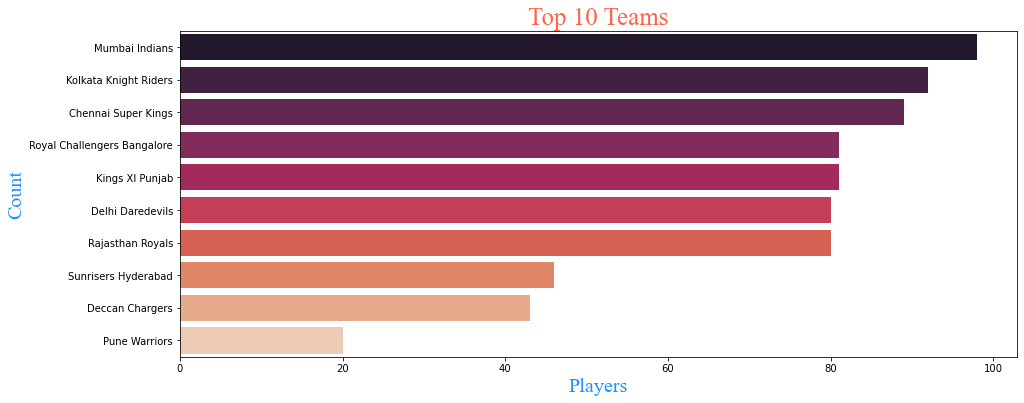

In [14]:
plt.figure(figsize=(15,6))
style1  = {'family': 'Times New Roman', 'color': 'Tomato', 'size': 25}
style2  = {'family': 'Times New Roman', 'color': 'DodgerBlue', 'size': 20}
sns.barplot(matches['toss_winner'].value_counts()[:10].values, matches['toss_winner'].value_counts()[:10].index,palette='rocket')
plt.title('Top 10 Teams', fontdict=style1 )
plt.xlabel('Players' , fontdict=style2 )
plt.ylabel('Count', fontdict=style2 )
#plt.xticks(rotation=90)
plt.show()

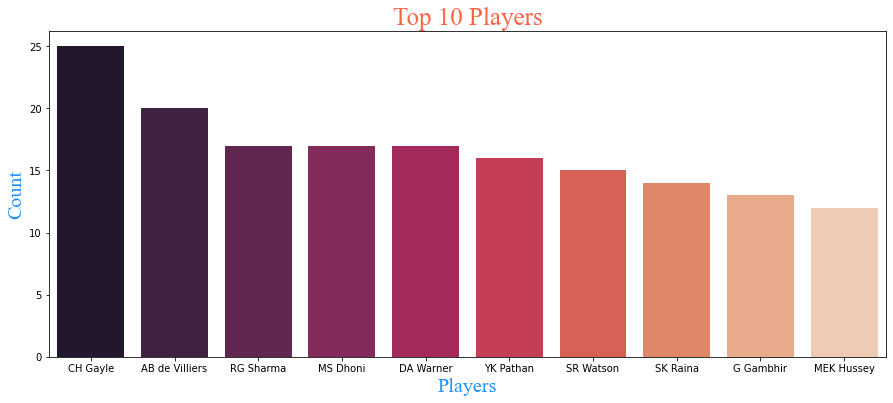

In [15]:
plt.subplots(figsize=(15,6))
style1  = {'family': 'Times New Roman', 'color': 'Tomato', 'size': 25}
style2  = {'family': 'Times New Roman', 'color': 'DodgerBlue', 'size': 20}
sns.barplot(matches['player_of_match'].value_counts()[:10].index, matches['player_of_match'].value_counts()[:10].values,palette='rocket')
plt.title('Top 10 Players', fontdict=style1 )
plt.xlabel('Players' , fontdict=style2 )
plt.ylabel('Count', fontdict=style2 )
plt.show()

###   Best Team is Mumbai Indians.
###    Best Player is CH Gayle.
##  Finding the Factors Affecting the Victory

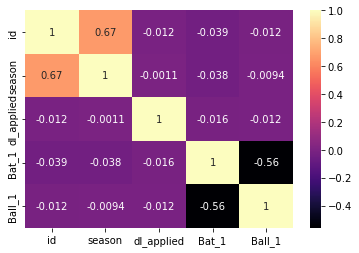

In [16]:
fac = sns.heatmap(matches.corr(), annot=True, cmap='magma')


####    Since, dl_applied and Season have 0 correlation to winning or loosing we can drop them.

In [17]:
matches = matches.drop(['dl_applied', 'season'], axis=1)

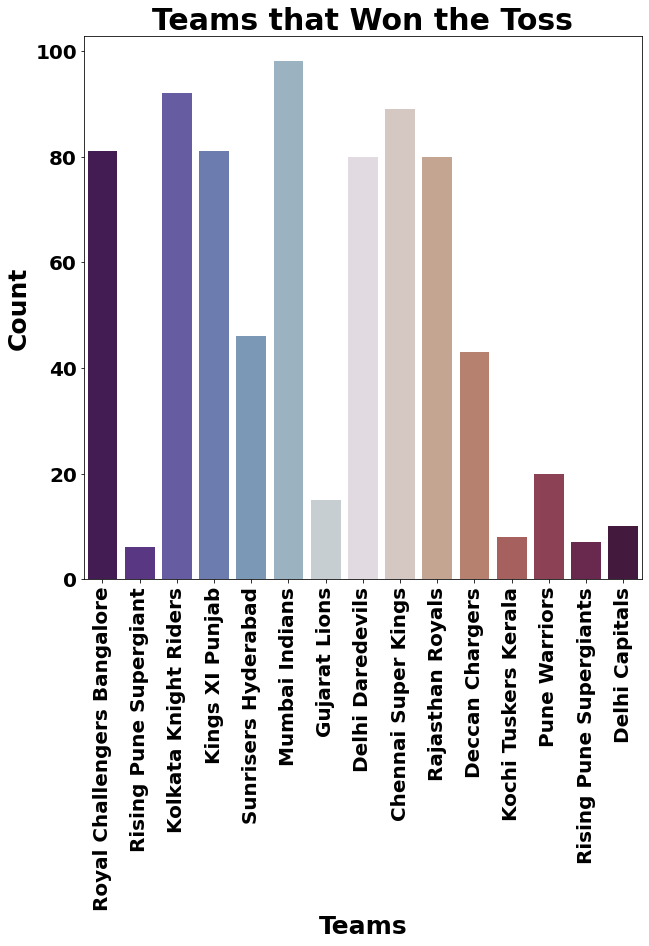

In [18]:
plt.figure(figsize=(10,10))

sns.countplot(matches['toss_winner'], data=matches, palette='twilight_shifted')

plt.xlabel('Teams', fontsize=25, fontweight='bold')
plt.ylabel('Count', fontsize=25, fontweight='bold')

plt.title('Teams that Won the Toss', fontweight="bold", size=30)

plt.xticks(rotation=90, fontweight="bold", size=20)
plt.yticks(fontweight="bold", size=20)

plt.show()

In [19]:
print('Team that won most matches by Batting First: ',matches.iloc[matches[matches['Bat_1'].ge(1)].Bat_1.idxmax()]['winner'])

Team that won most matches by Batting First:  Mumbai Indians


###   Data = Deliveries
This Dataset has ball-by-ball data of all the IPL matches including data of the batting team, batsman, bowler, non-striker, runs scored, etc.

In [20]:
deli = pd.read_csv('deliveries.csv')
deli.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [21]:
deli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [22]:
deli.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [23]:
deli = deli.drop(['dismissal_kind','fielder'], axis=1)

In [24]:
delivery=pd.merge(deli, matches, left_on='match_id', right_on='id')
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,winner,Bat_1,Ball_1,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA


In [25]:
print('Shape:', delivery.shape)
print('Size:', delivery.size)

Shape: (179078, 35)
Size: 6267730


In [26]:
delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
id                       0
city                     0
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
winner                   0
Bat_1                    0
Ball_1                   0
player_of_match          0
venue                    0
umpire1                  0
umpire2                  0
umpire3                  0
dtype: int64

In [27]:
delivery['player_dismissed'].fillna(value='NA', inplace=True)
delivery.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
id                  0
city                0
date                0
team1               0
team2               0
toss_winner         0
toss_decision       0
result              0
winner              0
Bat_1               0
Ball_1              0
player_of_match     0
venue               0
umpire1             0
umpire2             0
umpire3             0
dtype: int64

In [28]:
delivery.duplicated().sum()

23

In [29]:
delivery.drop_duplicates()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,winner,Bat_1,Ball_1,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,bat,normal,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,bat,normal,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,bat,normal,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,bat,normal,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


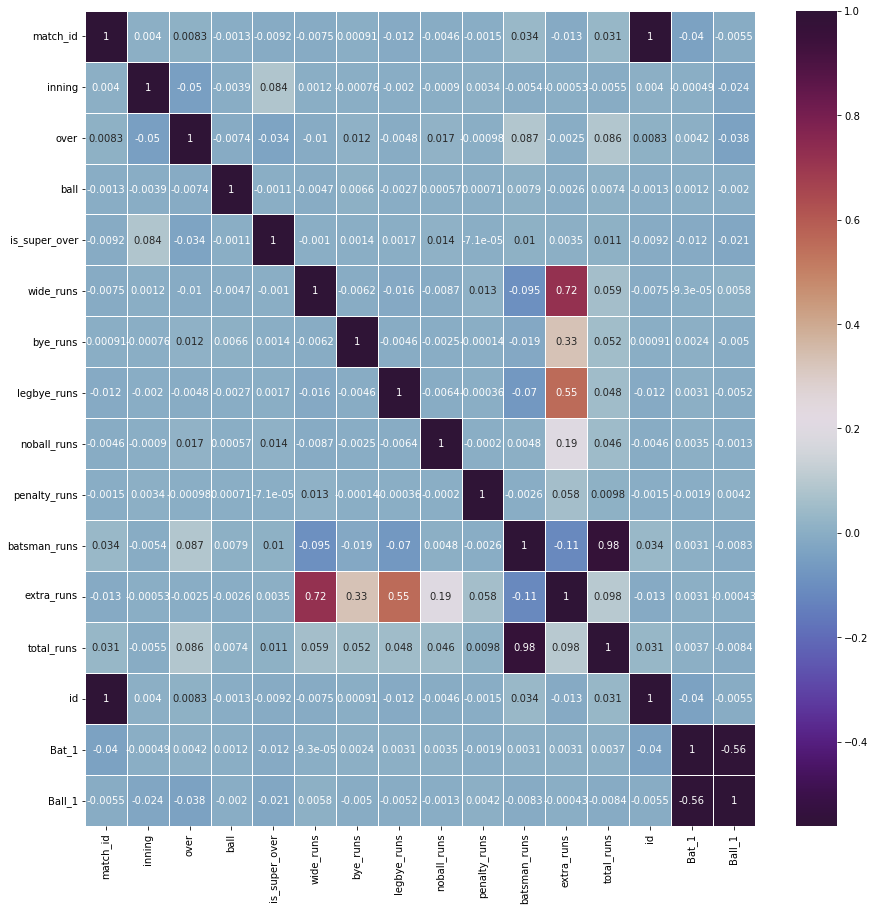

In [30]:
plt.figure(figsize=(15,15))
hm = sns.heatmap(delivery.corr(), annot=True, linewidth=1, cmap='twilight_shifted')

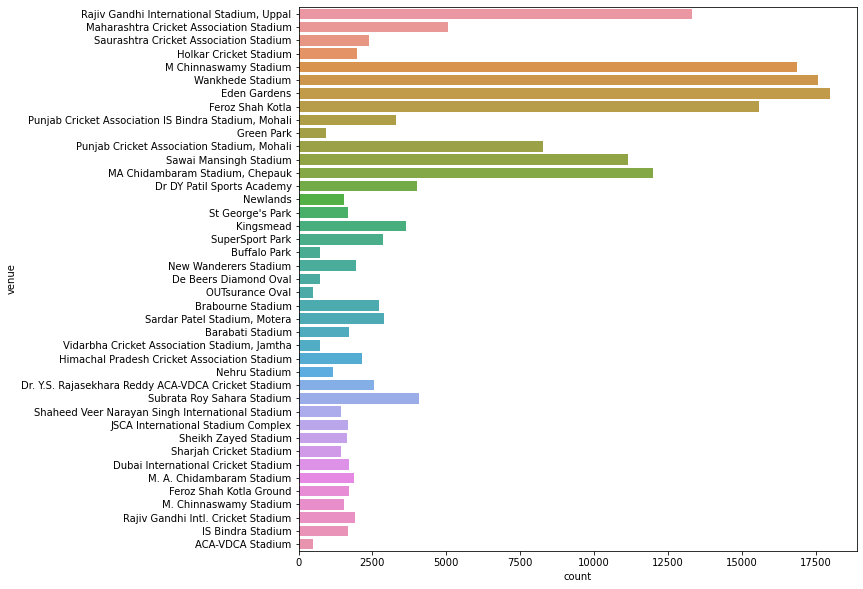

In [31]:
delivery.venue.value_counts()
plt.figure(figsize=(10,10))
sns.countplot(data=delivery, y='venue')
plt.show()

In [32]:
team_stats = pd.DataFrame({'Total Matches played': matches.team1.value_counts() + matches.team2.value_counts(), 'Total won': matches.winner.value_counts(), 'Toss won': matches.toss_winner.value_counts(), 
                          'Total lost': ((matches.team1.value_counts() + matches.team2.value_counts()) - matches.winner.value_counts())})
team_stats = team_stats.reset_index()
team_stats.rename(columns = {'index':'Teams'}, inplace = True)
winloss = team_stats['Total won'] / team_stats['Total Matches played']
winloss = pd.DataFrame({'Winloss Ratio': team_stats['Total won'] / team_stats['Total Matches played']})
winloss= winloss.round(2)
team_stats = team_stats.join(winloss)
team_stats

,Teams,Total Matches played,Total won,Toss won,Total lost,Winloss Ratio
0,Chennai Super Kings,164,100,89,64,0.61
1,Deccan Chargers,75,29,43,46,0.39
2,Delhi Capitals,16,10,10,6,0.62
3,Delhi Daredevils,161,67,80,94,0.42
4,Gujarat Lions,30,13,15,17,0.43
5,Kings XI Punjab,176,82,81,94,0.47
6,Kochi Tuskers Kerala,14,6,8,8,0.43
7,Kolkata Knight Riders,178,92,92,86,0.52
8,Mumbai Indians,187,113,98,74,0.60
9,Pune Warriors,46,12,20,34,0.26


Text(0.5, 1.0, 'Maximum Toss Won')

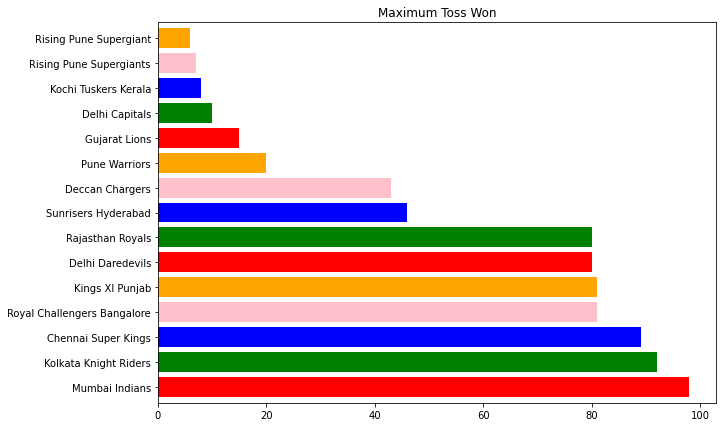

In [33]:
plt.subplots(figsize=(10,7))
ax=matches['toss_winner'].value_counts().plot.barh(width=0.8,color=['red', 'green','blue','pink','orange'])
plt.title("Maximum Toss Won")

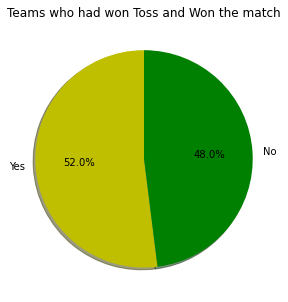

In [34]:
Tosswin_matchwin=matches[matches['toss_winner']==matches['winner']]
slices=[len(Tosswin_matchwin),(len(matches)-len(Tosswin_matchwin))]
labels=['Yes','No']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['y','g'])
plt.title("Teams who had won Toss and Won the match")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()
#The Chances of the team winning, if it has won the toss are reasonably high.
#Toss favours to the victory of team

<AxesSubplot:>

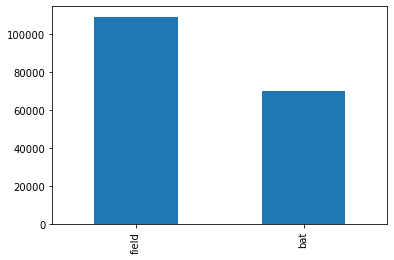

In [35]:
ts=delivery.toss_decision.value_counts().plot(kind='bar')
ts

Text(0.5, 1.0, 'Toss Wins vs Victory')

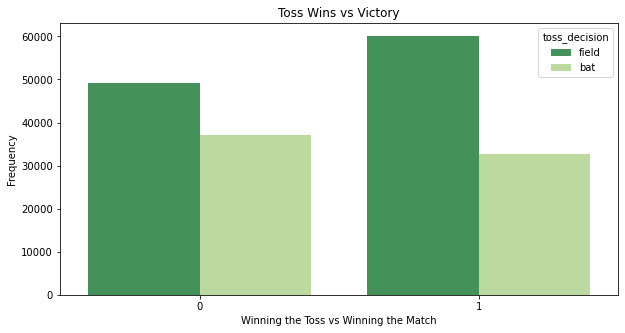

In [36]:
delivery['team_toss_win']=np.where((delivery.toss_winner==delivery.winner),1,0)
plt.figure(figsize=(10,5))
sns.countplot('team_toss_win', data=delivery, hue='toss_decision', palette='YlGn_r')
plt.xlabel("Winning the Toss vs Winning the Match")
plt.ylabel("Frequency")
plt.title("Toss Wins vs Victory")

In [37]:
batsmen = delivery.groupby("batsman").agg({'ball': 'count','batsman_runs': 'sum'})
batsmen.rename(columns={'ball':'balls', 'batsman_runs': 'runs'}, inplace=True)
batsmen = batsmen.sort_values(['balls','runs'], ascending=False)
batsmen['batting_strike_rate'] = batsmen['runs']/batsmen['balls'] * 100
batsmen['batting_strike_rate'] = batsmen['batting_strike_rate'].round(2)
batsmen.head(10)

,balls,runs,batting_strike_rate
batsman,,,
V Kohli,4211,5434,129.04
SK Raina,4044,5415,133.90
RG Sharma,3816,4914,128.77
S Dhawan,3776,4632,122.67
G Gambhir,3524,4223,119.84
RV Uthappa,3492,4446,127.32
DA Warner,3398,4741,139.52
MS Dhoni,3318,4477,134.93
AM Rahane,3215,3850,119.75


In [38]:
#utility function used later
def trybuild(lookuplist, buildlist):
    alist = []
    for i in buildlist.index:
        try:
            #print(i)
            alist.append(lookuplist[i])
            #print(alist)
        except KeyError:
            #print('except')
            alist.append(0)
    return alist

In [39]:
TopBatsman = batsmen.sort_values(['balls','runs'], ascending=False)[:20]
TopBatsman

,balls,runs,batting_strike_rate
batsman,,,
V Kohli,4211,5434,129.04
SK Raina,4044,5415,133.90
RG Sharma,3816,4914,128.77
S Dhawan,3776,4632,122.67
G Gambhir,3524,4223,119.84
RV Uthappa,3492,4446,127.32
DA Warner,3398,4741,139.52
MS Dhoni,3318,4477,134.93
AM Rahane,3215,3850,119.75


In [40]:
alist = []
for r in delivery.batsman_runs.unique():
    lookuplist = delivery[delivery.batsman_runs == r].groupby('batsman')['batsman'].count()
    batsmen[str(r) + 's'] = trybuild(lookuplist, batsmen)
    try:
        alist.append(lookuplist[r])
    except KeyError:
        alist.append(0)
TopBatsman = batsmen.sort_values(['balls','runs'], ascending=False)[:20]
TopBatsman.head(10)

,balls,runs,batting_strike_rate,0s,4s,1s,6s,3s,2s,5s,7s
batsman,,,,,,,,,,,
V Kohli,4211,5434,129.04,1493,482,1741,191,11,293,0,0
SK Raina,4044,5415,133.90,1381,495,1695,195,11,266,1,0
RG Sharma,3816,4914,128.77,1390,431,1589,194,5,205,1,1
S Dhawan,3776,4632,122.67,1455,526,1473,96,18,205,3,0
G Gambhir,3524,4223,119.84,1351,492,1358,59,15,249,0,0
RV Uthappa,3492,4446,127.32,1382,436,1295,156,13,206,4,0
DA Warner,3398,4741,139.52,1254,459,1213,181,18,271,2,0
MS Dhoni,3318,4477,134.93,1111,297,1383,207,14,304,0,2
AM Rahane,3215,3850,119.75,1198,405,1308,74,15,214,1,0


In [41]:
#Build a dictionary of Matches player by each batsman
played = {}
def BuildPlayedDict(x):
    #print(x.shape, x.shape[0], x.shape[1])
    for p in x.batsman.unique():
        if p in played:
            played[p] += 1
        else:
            played[p] = 1

delivery.groupby('match_id').apply(BuildPlayedDict)
import operator

In [42]:
TopBatsman['matches_played'] = [played[p] for p in TopBatsman.index]
TopBatsman['average']= TopBatsman['runs']/TopBatsman['matches_played']

TopBatsman['6s/match'] = TopBatsman['6s']/TopBatsman['matches_played']  
TopBatsman['6s/match'].median()

TopBatsman['4s/match'] = TopBatsman['4s']/TopBatsman['matches_played']  
TopBatsman['4s/match']
TopBatsman

,balls,runs,batting_strike_rate,0s,4s,1s,6s,3s,2s,5s,7s,matches_played,average,6s/match,4s/match
batsman,,,,,,,,,,,,,,,
V Kohli,4211,5434,129.04,1493,482,1741,191,11,293,0,0,169,32.153846,1.130178,2.852071
SK Raina,4044,5415,133.90,1381,495,1695,195,11,266,1,0,189,28.650794,1.031746,2.619048
RG Sharma,3816,4914,128.77,1390,431,1589,194,5,205,1,1,182,27.000000,1.065934,2.368132
S Dhawan,3776,4632,122.67,1455,526,1473,96,18,205,3,0,158,29.316456,0.607595,3.329114
G Gambhir,3524,4223,119.84,1351,492,1358,59,15,249,0,0,151,27.966887,0.390728,3.258278
RV Uthappa,3492,4446,127.32,1382,436,1295,156,13,206,4,0,170,26.152941,0.917647,2.564706
DA Warner,3398,4741,139.52,1254,459,1213,181,18,271,2,0,126,37.626984,1.436508,3.642857
MS Dhoni,3318,4477,134.93,1111,297,1383,207,14,304,0,2,170,26.335294,1.217647,1.747059
AM Rahane,3215,3850,119.75,1198,405,1308,74,15,214,1,0,132,29.166667,0.560606,3.068182


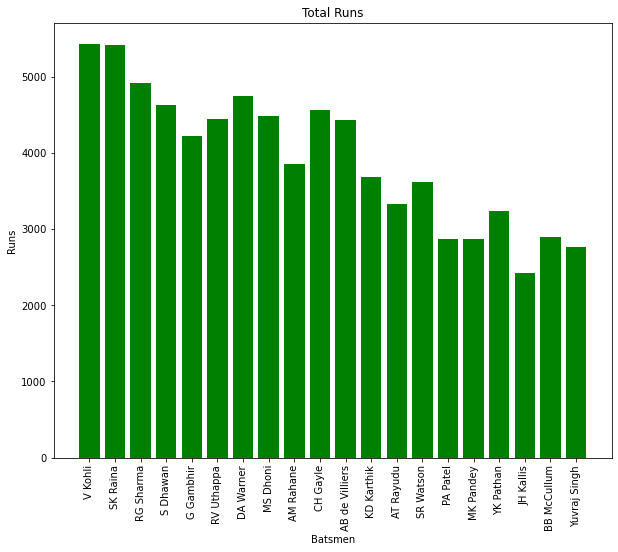

In [43]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(TopBatsman)),TopBatsman['runs'],color='g')
plt.xticks(ticks=np.arange(len(TopBatsman)),labels=TopBatsman.index,rotation=90)
plt.xlabel('Batsmen')
plt.ylabel('Runs')
plt.title('Total Runs')
plt.show()

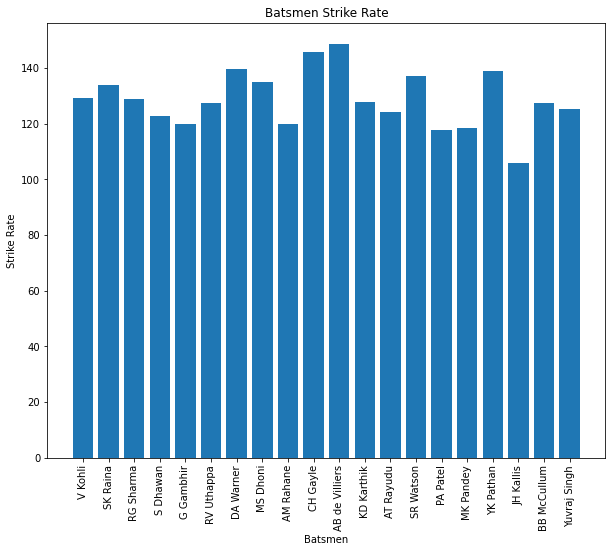

In [44]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(TopBatsman)),TopBatsman['batting_strike_rate'])
plt.xticks(ticks=np.arange(len(TopBatsman)),labels=TopBatsman.index,rotation=90)
plt.xlabel('Batsmen')
plt.ylabel('Strike Rate')
plt.title('Batsmen Strike Rate')
plt.show()

Text(0.5, 1.0, 'Top 5 Batsmen')

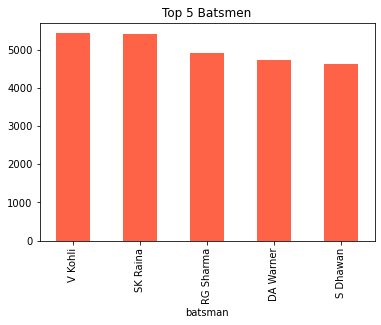

In [45]:
delivery.groupby('batsman')['batsman_runs'].agg("sum").sort_values(ascending= False).head().plot(kind='bar', color='Tomato')
plt.title("Top 5 Batsmen")

In [46]:
bowler_wickets = delivery.groupby('bowler').aggregate({'ball': 'count', 'total_runs': 'sum', 'player_dismissed' : 'count'})
bowler_wickets.columns = ['runs','balls','wickets']
TopBowlers = bowler_wickets.sort_values(['wickets'], ascending=False)[:20]
TopBowlers

,runs,balls,wickets
bowler,,,
Harbhajan Singh,3451,4050,3451
A Mishra,3172,3850,3172
PP Chawla,3157,4153,3157
R Ashwin,3016,3391,3016
SL Malinga,2974,3511,2974
DJ Bravo,2711,3733,2711
B Kumar,2707,3264,2707
P Kumar,2637,3342,2637
UT Yadav,2605,3640,2605


In [47]:
TopBowlers['economy'] = TopBowlers['runs']/(TopBowlers['balls']/6)
TopBowlers = TopBowlers.sort_values(['economy'], ascending=True)[:20]
TopBowlers

,runs,balls,wickets,economy
bowler,,,,
UT Yadav,2605,3640,2605,4.293956
R Vinay Kumar,2186,3043,2186,4.310220
DJ Bravo,2711,3733,2711,4.357353
I Sharma,1999,2682,1999,4.472036
PP Chawla,3157,4153,3157,4.561040
RP Singh,1874,2417,1874,4.652048
SR Watson,2137,2751,2137,4.660851
A Nehra,1974,2537,1974,4.668506
IK Pathan,2113,2711,2113,4.676503


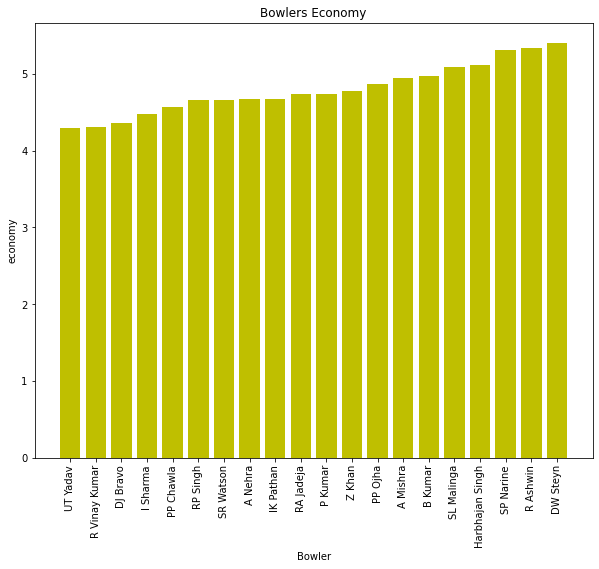

In [48]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(TopBowlers)),TopBowlers['economy'],color='y')
plt.xticks(ticks=np.arange(len(TopBowlers)),labels=TopBowlers.index,rotation=90)
plt.xlabel('Bowler')
plt.ylabel('economy')
plt.title('Bowlers Economy')
plt.show()

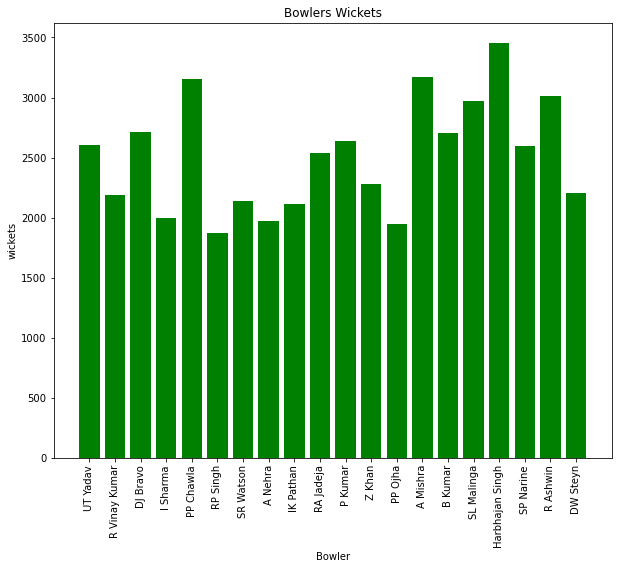

In [49]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(TopBowlers)),TopBowlers['wickets'],color='GREEN')
plt.xticks(ticks=np.arange(len(TopBowlers)),labels=TopBowlers.index,rotation=90)
plt.xlabel('Bowler')
plt.ylabel('wickets')
plt.title('Bowlers Wickets')
plt.show()

Text(0.5, 1.0, 'Top 5 Bowlers')

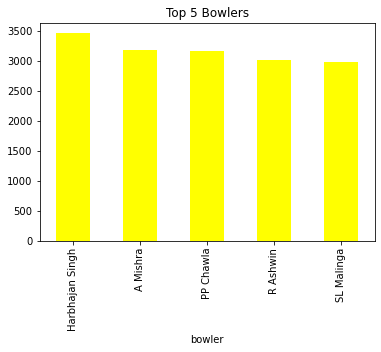

In [50]:
delivery.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(5).plot(kind='bar', color='yellow')
plt.title("Top 5 Bowlers")

##  Harbhajan Singh and A Mishra took the most wickets, so probability is that in whichever team they are that team has high chances of winning by wickets.
Conclusion

*Best Team is Mumbai Indians.

*Best Player is CH Gayle.

*Winning Toss and Batting first are a factor that affect the victory.

*Most matches have been played in Eden Gardens followed by Wankhede Stadium.

*Teams who win toss choose to field first.

*Teams who choose to field after winning the toss have high chances of winning.

*Virat Kohli and S.K Raina Scored the most runs, so probability is that in whichever team they are that team has high chances of winning by runs and comapnies can also hire them to endorse products of batting.

*Harbhajan Singh and A Mishra took the most wickets, so probability is that in whichever team they are that team has high chances of winning by wickets and comapnies can also hire them to endorse products of bowling.

*Top Players like, CH Gayle, AB de Villiers, MS Dhoni, and DA Warner can be hired by many companies to endorse their products as they have a huge fanbase.

Thankyou!